## Demo for modelling 4Pi-PSF from SMLM data

#### Setup environment

In [1]:
import sys
sys.path.append("..")
from psflearning.psflearninglib import psflearninglib
from psflearning import io
from psflearning.makeplots import *
import tensorflow as tf
main_data_dir = io.param.load('datapath.yaml').main_data_dir
try:
    gpus = tf.config.list_physical_devices('GPU')
    tf.config.experimental.set_virtual_device_configuration(gpus[0],[tf.config.experimental.VirtualDeviceConfiguration(memory_limit=6000)])
    print('Running on GPU')
except:
    print('Running on CPU')

Running on GPU


#### Create psflearning object and load the config file
$\small\color{skyblue}{\mathrm{basefile}}$: config file with all parameters  
$\small\color{skyblue}{\mathrm{sysfile}}$: config file with microscope specific parameters  
For advanced user, pass in base file only as below to interact with all parameters:   
```python
    L.param = io.param.combine('config_base')
```

In [2]:
L = psflearninglib()
L.param = io.param.combine(basefile='config_base',psftype='insitu',channeltype='4pi',sysfile='4pi')

#### Edit user defined parameters

In [3]:
L.param.datapath = main_data_dir+'/4pi_smlm_nup96/'
L.param.savename = L.param.datapath + 'psfmodel_iter'
L.param.keyword = 'cell3' # keyword of the file name or the full file name without extension
L.param.gain = 0.44
L.param.ccd_offset = 100
L.param.roi.peak_height = 0.4 # relative to maximum bead intensity, bead intensity below which are rejected
L.param.batch_size = 500 # lower this number if out of memory
L.param.option.insitu.stage_pos = 0.55 # micron, stage position relative to infocus at the coverslip
L.param.ref_channel = 0 # choose the brighter channel as the reference channel, 0 or 1
L.param.option.model.const_pupilmag = True 
L.param.option.insitu.var_stagepos = False

In [4]:
L.param.savename = 'psfmodel_iter'

#### Start learning

In [5]:
images = L.load_data()
L.getpsfclass()
dataobj = L.prep_data(images)
resfile = L.iterlearn_psf(dataobj,time=0)

E:/EMBL files/data for PSF learning/example data for uiPSF//4pi_smlm_nup96\cell3_nup96_mMaple__560_00043_00000.mat
E:/EMBL files/data for PSF learning/example data for uiPSF//4pi_smlm_nup96\cell3_nup96_mMaple__560_00067_00000.mat
(4, 4000, 200, 200)
rois shape channel 0: (13112, 21, 21)
rois shape channel 1: (13645, 21, 21)
rois shape channel 2: (13112, 21, 21)
rois shape channel 3: (13645, 21, 21)
rois shape channel 0: (10635, 21, 21)
rois shape channel 1: (10635, 21, 21)
rois shape channel 2: (10635, 21, 21)
rois shape channel 3: (10635, 21, 21)


4/6: calculating spline coefficients: 4/4 [00:10s]  2.51s/it total time: 10.05s
5/6: localization: 4/4 [00:35s]  9.00s/it total time: 46.04s
c:\Users\Sheng\Documents\git\python\uiPSF\demo\..\psflearning\learning\psfs\PSFMultiChannel4pi_smlm_file.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  zp = locres[-1]['zast'].flatten()+np.float32(self.sub_psfs[0].Zoffset.flatten())
3/6: learning: 73/100 [01:05s]  1.11it/s, current loss: 0.27219, total time: 65.58s
3/6: learning: 91/100 [01:21s]  1.12it/s, current loss: 0.28898, total time: 146.99s
3/6: learning: 24/100 [00:21s]  1.12it/s, current loss: 0.28357, total time: 168.39s
3/6: learning: 82/100 [01:13s]  1.12it/s, current loss: 0.27065, total time: 241.83s
3/6: learning: 204/250 [07:50s]  2.31s/it, current loss: 1.05227, total time: 712.33s


outlier percentage: 0.24930167597765363
rois shape channel 0: (2150, 21, 21)
rois shape channel 1: (2150, 21, 21)
rois shape channel 2: (2150, 21, 21)
rois shape channel 3: (2150, 21, 21)


3/6: learning: 84/250 [02:41s]  1.92s/it, current loss: 1.03543, total time: 873.86s
4/6: calculating spline coefficients: 4/4 [00:10s]  2.55s/it total time: 10.21s
5/6: localization: 4/4 [00:05s]  1.26s/it total time: 15.25s
6/6: saving results: [00:10s] total time: 25.95s
4/6: calculating spline coefficients: 4/4 [00:10s]  2.51s/it total time: 10.04s
5/6: localization: 4/4 [00:35s]  8.88s/it total time: 45.56s
3/6: learning: 24/100 [00:24s]  1.03s/it, current loss: 0.66607, total time: 24.81s
3/6: learning: 14/100 [00:14s]  1.04s/it, current loss: 0.65236, total time: 39.42s
3/6: learning: 93/100 [01:37s]  1.05s/it, current loss: 0.59411, total time: 137.28s
3/6: learning: 23/100 [00:24s]  1.05s/it, current loss: 0.65345, total time: 161.33s
3/6: learning: 235/250 [10:46s]  2.75s/it, current loss: 2.30024, total time: 807.33s


outlier percentage: 0.2488902042024268
rois shape channel 0: (2538, 21, 21)
rois shape channel 1: (2538, 21, 21)
rois shape channel 2: (2538, 21, 21)
rois shape channel 3: (2538, 21, 21)


3/6: learning: 238/250 [09:13s]  2.33s/it, current loss: 2.27700, total time: 1361.19s
4/6: calculating spline coefficients: 4/4 [00:10s]  2.51s/it total time: 10.03s
5/6: localization: 4/4 [00:05s]  1.28s/it total time: 15.17s
6/6: saving results: [00:10s] total time: 25.72s


#### Show results

In [6]:
f,p = io.h5.load(resfile) # load result file

channel 0


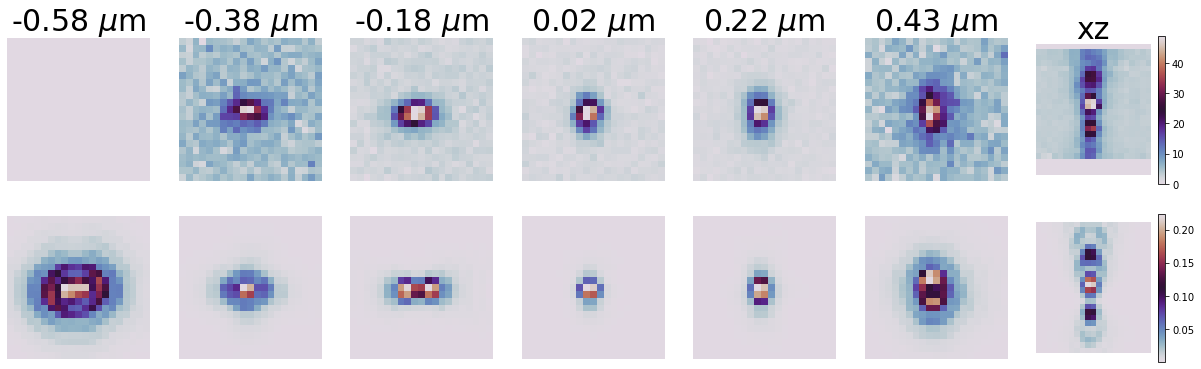

channel 1


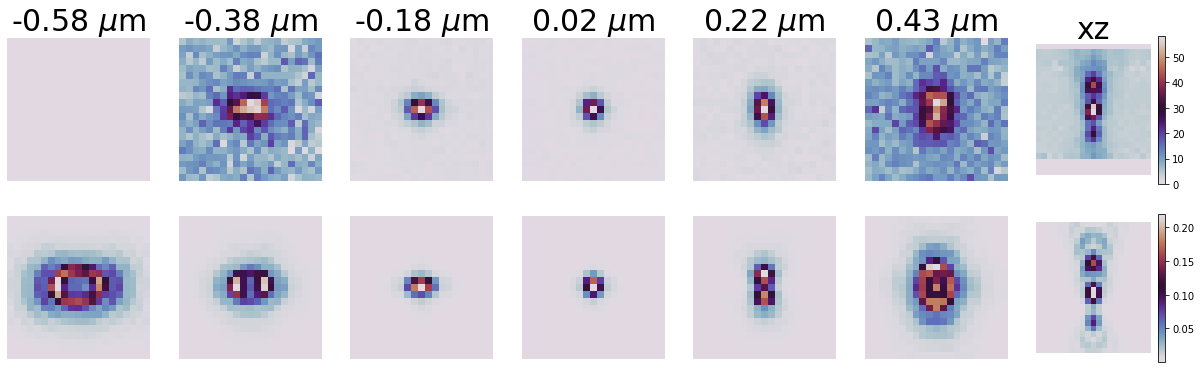

channel 2


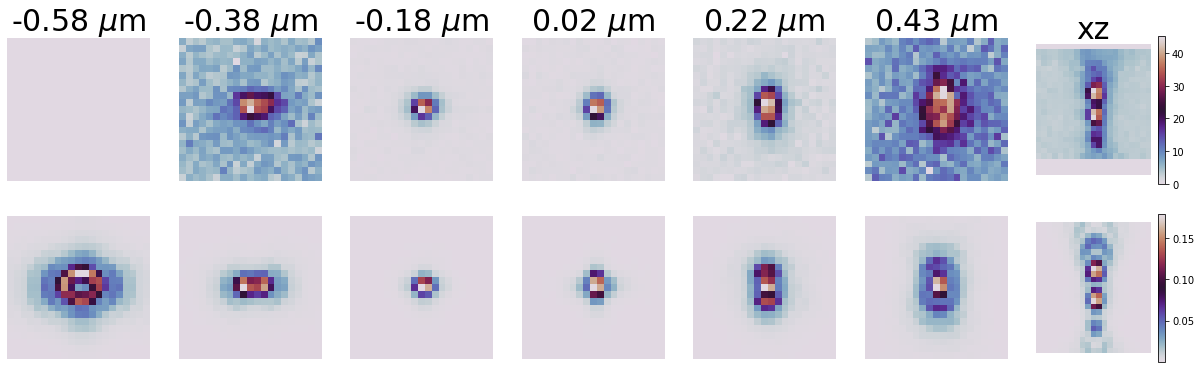

channel 3


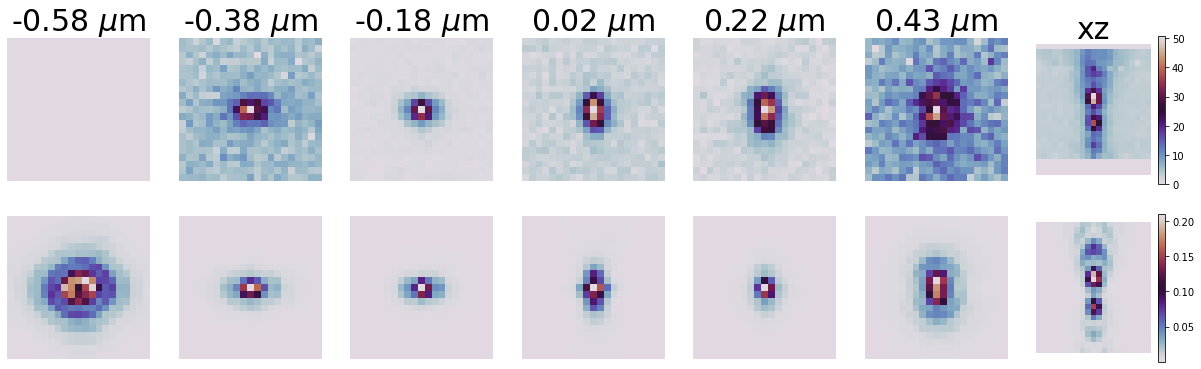

In [7]:
showpsfvsdata_insitu(f,p)

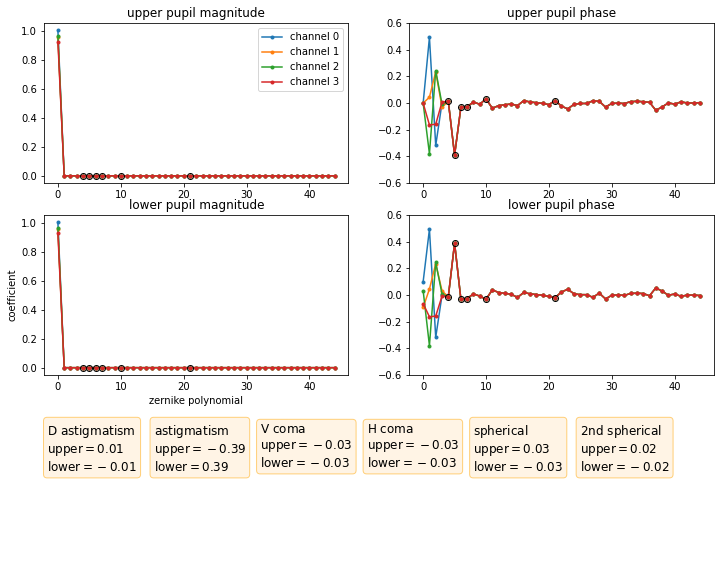

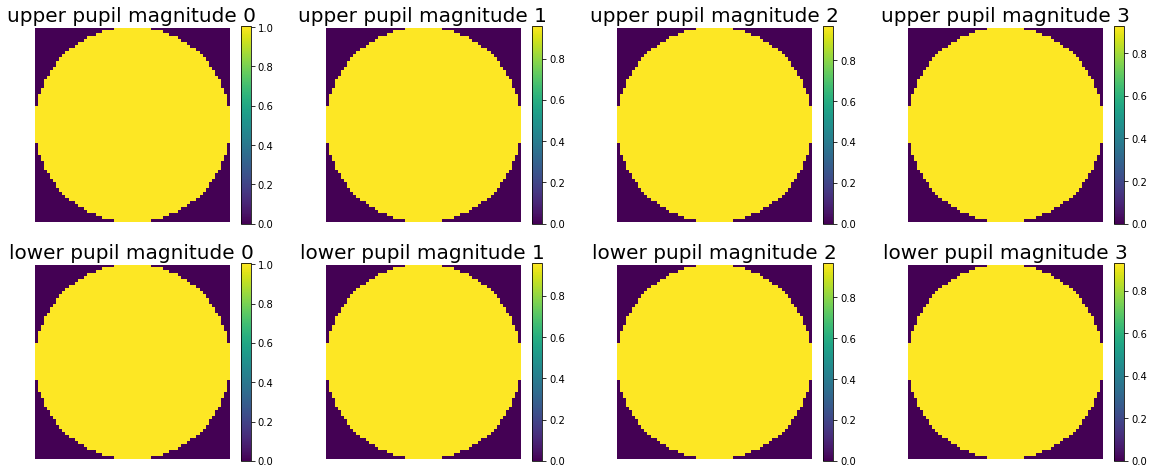

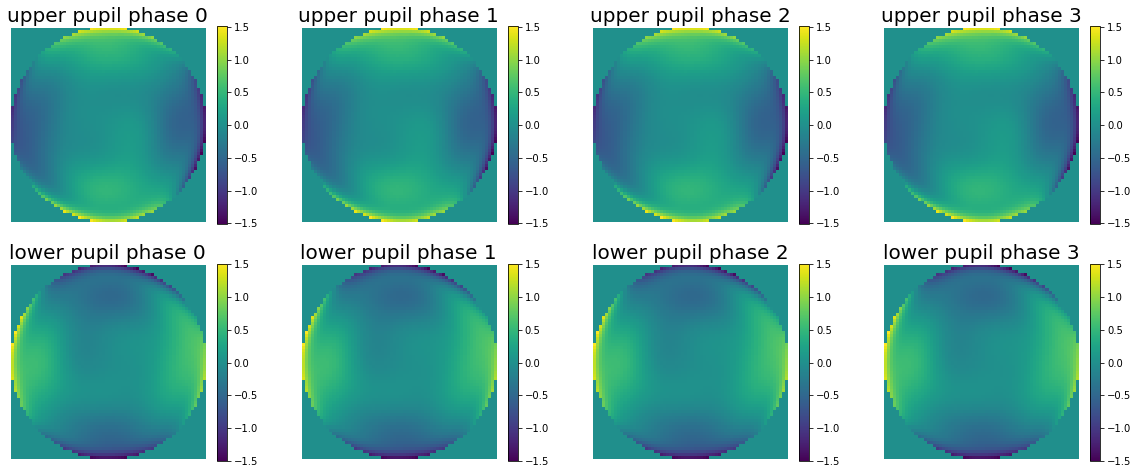

In [8]:
try:
    showzernike(f,p)
except:
    try: 
        showpupil(f,p)
    except:
        print('no pupil')

##### Optional plots

[[[ 1.0005  0.0043  0.    ]
  [-0.0054  0.9989  0.    ]
  [-0.4456 -0.002   1.    ]]

 [[ 0.9976 -0.0004  0.    ]
  [ 0.0012  0.9969  0.    ]
  [-0.3175  0.4107  1.    ]]

 [[ 0.9968 -0.0059  0.    ]
  [ 0.0044  0.9995  0.    ]
  [-0.3802  0.0403  1.    ]]]


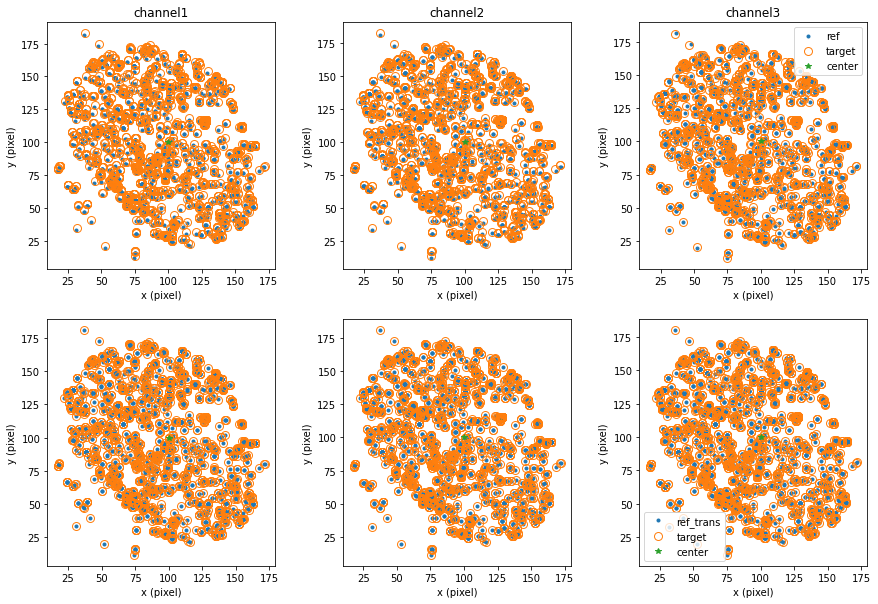

In [9]:
showtransform(f)
np.set_printoptions(precision=4,suppress=True)
print(f.res.T)

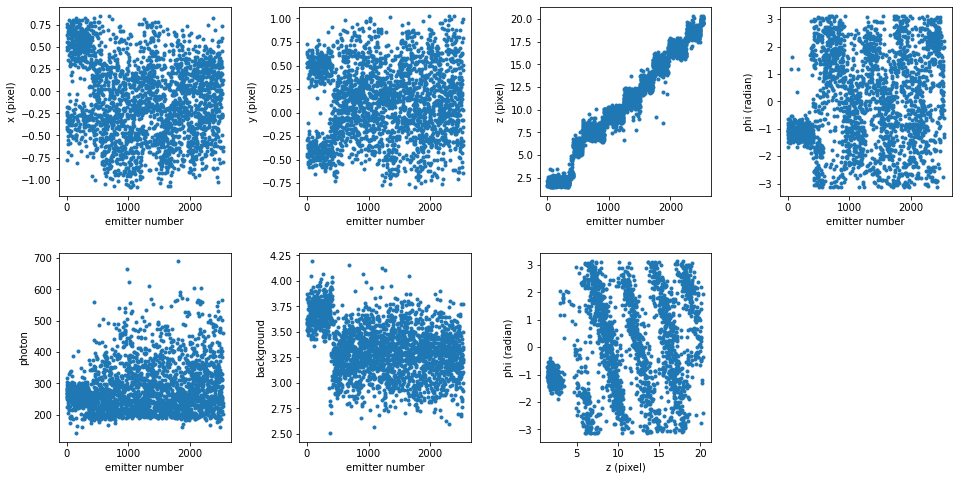

In [10]:
showlearnedparam_insitu(f,p)

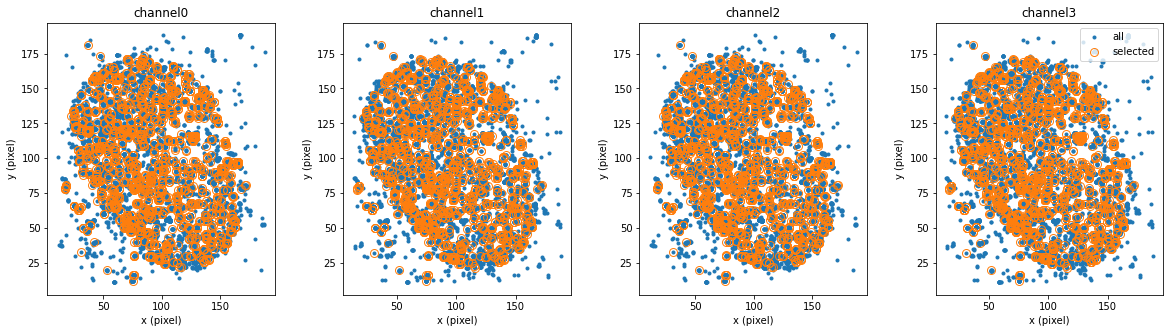

In [11]:
showcoord(f,p)

#### Ouput parameters

In [13]:
print('f:\n    ',list(f.keys()))
print(' locres:\n    ',list(f.locres.keys()))
print(' res:\n    ',list(f.res.keys()))
print(' rois:\n    ',list(f.rois.keys()))

f:
     ['locres', 'res', 'rois']
 locres:
     ['CRLB', 'LL', 'P', 'coeff', 'coeff_bead', 'coeff_reverse', 'loc']
 res:
     ['T', 'channel0', 'channel1', 'channel2', 'channel3', 'imgcenter', 'xyshift']
 rois:
     ['cor', 'fileID', 'image_size', 'psf_data', 'psf_fit']
